# Análise Exploratória - Câncer de Mama (CBIS-DDSM)

Este notebook realiza uma análise exploratória do dataset de câncer de mama (CBIS-DDSM), focando em:

- Download do dataset do Kaggle
- Análise da estrutura de diretórios
- Estatísticas descritivas (número de imagens por classe)
- Visualização de amostras de imagens
- Análise de distribuição de classes
- Verificação de dimensões das imagens
- Análise de qualidade das imagens

## Dataset

O dataset utilizado é o **CBIS-DDSM (Curated Breast Imaging Subset of DDSM)** do Kaggle, que contém imagens de mamografia classificadas em:
- **Benigno**: Lesões benignas
- **Maligno**: Lesões malignas (câncer)


In [6]:
import sys
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yaml
from PIL import Image
import importlib

# Adicionar o diretório raiz do projeto ao sys.path
project_root = Path().resolve().parent
sys.path.insert(0, str(project_root))

# Importar e recarregar módulos do projeto (para garantir que estamos usando a versão mais recente)
import src.vision.data_loader
importlib.reload(src.vision.data_loader)

# Importar módulos do projeto
from src.vision.data_loader import (
    download_breast_cancer_dataset,
    load_breast_cancer_dataset,
    find_breast_cancer_dataset_path,
    get_class_distribution,
    validate_images,
    get_image_info
)

# Configuração
with open("../config.yaml", "r") as f:
    config = yaml.safe_load(f)

print("Módulos importados com sucesso!")


Módulos importados com sucesso!


## 1. Download do Dataset

Primeiro, vamos baixar o dataset do Kaggle usando kagglehub.


In [7]:
# Baixar dataset de câncer de mama
# A função find_breast_cancer_dataset_path tenta encontrar o dataset automaticamente:
# 1. Verifica o caminho do config.yaml
# 2. Se não encontrar, procura no cache do kagglehub
# 3. Se ainda não encontrar, faz o download automaticamente
dataset_path = find_breast_cancer_dataset_path(config["data"]["images"]["breast_cancer_path"])

print(f"\nDataset disponível em: {dataset_path}")


Dataset encontrado no cache: /Users/vinicius/.cache/kagglehub/datasets/awsaf49/cbis-ddsm-breast-cancer-image-dataset/versions/1

Dataset disponível em: /Users/vinicius/.cache/kagglehub/datasets/awsaf49/cbis-ddsm-breast-cancer-image-dataset/versions/1


## 2. Carregamento e Estrutura do Dataset

Vamos carregar as imagens e analisar a estrutura do dataset. O CBIS-DDSM pode ter uma estrutura mais complexa que o dataset de pneumonia.


In [8]:
# Carregar dataset
# O CBIS-DDSM tem estrutura diferente: imagens em jpeg/ e labels nos CSVs
# Usar a função específica para este dataset
df = load_breast_cancer_dataset(dataset_path)

print(f"Total de imagens carregadas: {len(df)}")
print(f"\nPrimeiras linhas do DataFrame:")
print(df.head(10))

print(f"\nEstrutura do dataset:")
print(df.info())

# Verificar estrutura de diretórios
print(f"\nEstrutura de diretórios explorada:")
if 'split' in df.columns:
    print(f"Splits encontrados: {df['split'].unique()}")
print(f"Classes encontradas: {df['label'].unique()}")


Total de imagens carregadas: 2886

Primeiras linhas do DataFrame:
                                          image_path      label  split
0  /Users/vinicius/.cache/kagglehub/datasets/awsa...  MALIGNANT  train
1  /Users/vinicius/.cache/kagglehub/datasets/awsa...  MALIGNANT  train
2  /Users/vinicius/.cache/kagglehub/datasets/awsa...     BENIGN  train
3  /Users/vinicius/.cache/kagglehub/datasets/awsa...     BENIGN  train
4  /Users/vinicius/.cache/kagglehub/datasets/awsa...     BENIGN  train
5  /Users/vinicius/.cache/kagglehub/datasets/awsa...  MALIGNANT  train
6  /Users/vinicius/.cache/kagglehub/datasets/awsa...  MALIGNANT  train
7  /Users/vinicius/.cache/kagglehub/datasets/awsa...  MALIGNANT  train
8  /Users/vinicius/.cache/kagglehub/datasets/awsa...     BENIGN  train
9  /Users/vinicius/.cache/kagglehub/datasets/awsa...     BENIGN  train

Estrutura do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2886 entries, 0 to 2885
Data columns (total 3 columns):
 #   Column      Non-Nul

## 3. Análise da Distribuição de Classes

Vamos analisar a distribuição das classes.


Distribuição de Classes:
label  BENIGN  MALIGNANT   All
split                         
test      324        276   600
train    1105       1181  2286
All      1429       1457  2886


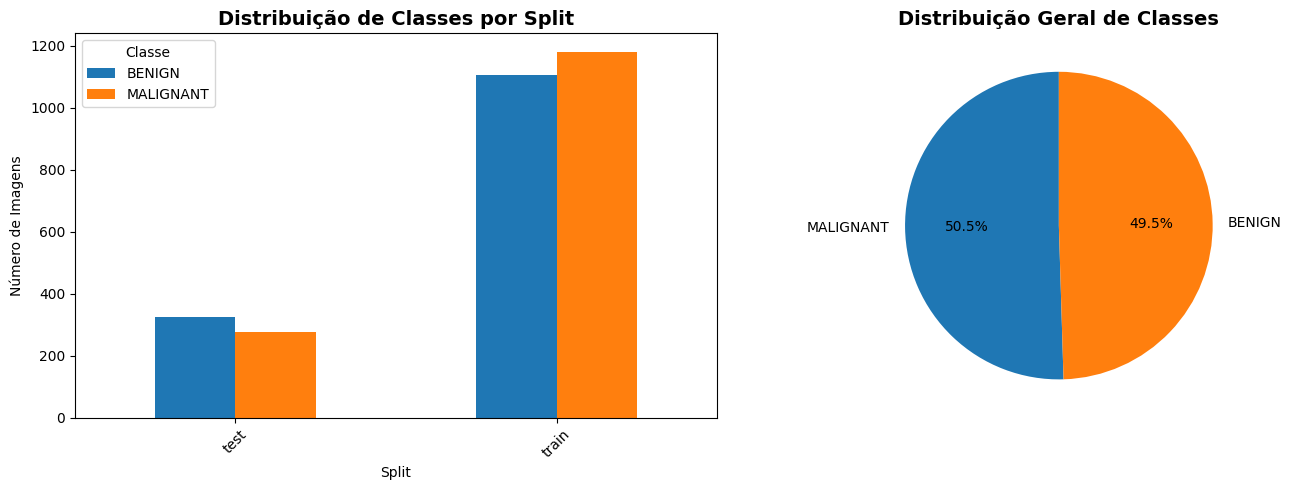

In [9]:
# Distribuição de classes
distribution = get_class_distribution(df, split_col='split' if 'split' in df.columns else None)

print("Distribuição de Classes:")
print("=" * 60)
print(distribution)

# Visualização
if 'split' in df.columns:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Gráfico de barras por split
    split_dist = pd.crosstab(df['split'], df['label'])
    split_dist.plot(kind='bar', ax=axes[0], stacked=False)
    axes[0].set_title('Distribuição de Classes por Split', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Split')
    axes[0].set_ylabel('Número de Imagens')
    axes[0].legend(title='Classe')
    axes[0].tick_params(axis='x', rotation=45)
    
    # Gráfico de pizza geral
    label_counts = df['label'].value_counts()
    axes[1].pie(label_counts.values, labels=label_counts.index, autopct='%1.1f%%', startangle=90)
    axes[1].set_title('Distribuição Geral de Classes', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
else:
    # Se não houver split, apenas mostrar distribuição geral
    label_counts = df['label'].value_counts()
    print("\nDistribuição Geral:")
    print(label_counts)
    
    plt.figure(figsize=(8, 5))
    label_counts.plot(kind='bar')
    plt.title('Distribuição de Classes', fontsize=14, fontweight='bold')
    plt.xlabel('Classe')
    plt.ylabel('Número de Imagens')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


## 4. Visualização de Amostras

Vamos visualizar algumas amostras de imagens de cada classe.


In [ ]:
# Visualizar amostras de cada classe
classes = df['label'].unique()
num_samples_per_class = 4

fig, axes = plt.subplots(len(classes), num_samples_per_class, figsize=(16, 8))

for i, class_name in enumerate(classes):
    class_images = df[df['label'] == class_name].sample(num_samples_per_class, random_state=42)
    
    for j, (idx, row) in enumerate(class_images.iterrows()):
        try:
            img = Image.open(row['image_path'])
            # Mamografias geralmente são em escala de cinza
            axes[i, j].imshow(img, cmap='gray')
            axes[i, j].set_title(f'{class_name}\n{Path(row["image_path"]).name}', fontsize=10)
            axes[i, j].axis('off')
        except Exception as e:
            axes[i, j].text(0.5, 0.5, f'Erro:\n{str(e)}', 
                          ha='center', va='center', transform=axes[i, j].transAxes)
            axes[i, j].axis('off')

plt.suptitle('Amostras de Imagens por Classe', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


## 5. Análise de Dimensões e Qualidade das Imagens

Vamos analisar as dimensões das imagens e verificar sua qualidade.


In [ ]:
# Obter informações sobre as imagens
image_info = get_image_info(df, sample_size=min(500, len(df)))

print("Informações sobre as Imagens:")
print("=" * 60)
print(f"Total de imagens: {image_info['total_images']}")
print(f"\nDimensões médias (amostra de {min(500, len(df))} imagens):")
print(f"  Largura média: {image_info['width_mean']:.1f} ± {image_info['width_std']:.1f} pixels")
print(f"  Altura média: {image_info['height_mean']:.1f} ± {image_info['height_std']:.1f} pixels")
print(f"\nFormatos de arquivo:")
for fmt, count in image_info['formats'].items():
    print(f"  {fmt}: {count} imagens")


## 6. Validação de Imagens

Vamos validar as imagens e remover arquivos corrompidos, se houver.


In [ ]:
# Validar imagens (isso pode levar algum tempo)
print(f"Validando {len(df)} imagens...")
df_valid = validate_images(df)

print(f"\nImagens válidas: {len(df_valid)}")
print(f"Imagens removidas: {len(df) - len(df_valid)}")

# Atualizar DataFrame
df = df_valid.copy()


## 7. Resumo e Próximos Passos

### Resumo da Análise Exploratória

- **Total de imagens**: {len(df)}
- **Classes**: {', '.join(df['label'].unique())}
- **Distribuição**: {df['label'].value_counts().to_dict()}

### Próximos Passos

1. Pré-processamento das imagens (redimensionamento, normalização, conversão para escala de cinza)
2. Divisão dos dados em treino/validação/teste
3. Treinamento de modelos CNN
4. Avaliação e interpretabilidade
